In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
# 定义高低风险组筛选出的top20药物
high_features = ['Sorafenib',
'PRIMA-1MET',
'Elephantin',
'GSK2578215A',
'Entinostat',
'Oxaliplatin',
'Irinotecan',
'Wnt-C59',
'BIBR-1532',
'Nilotinib',
]

In [3]:
# 定义RPN1筛选出的top20的药物
RPN1_features = ['Entinostat',
'GSK2578215A',
'ABT737',
'AZD1208',
'Vorinostat',
'OF-1',
'Tamoxifen',
'Sorafenib',
'IAP_5620',
'AGI-5198'
]

In [4]:
# 创建集合用于求交集
logistic_set = set(RPN1_features)  # 多元Logistic特征集合
lasso_set = set(high_features)    # Lasso特征集合
intersection = logistic_set.intersection(lasso_set)  # 两个集合的交集
logistic_only = logistic_set - intersection  # 仅Logistic选择的特征
lasso_only = lasso_set - intersection    # 仅Lasso选择的特征

In [5]:
# 创建图
G = nx.Graph()

# 添加节点和边
for feature in logistic_only:    
    G.add_edge('RPN1', feature, color='#DB432C')  # 淡红色表示仅被Logistic选择的特征
for feature in lasso_only:    
    G.add_edge('high', feature, color='#DCCD5B')  # 淡蓝色表示仅被Lasso选择的特征
for feature in intersection:    
    G.add_edge('RPN1', feature, color='#DB432C')  # 淡红色边连接交集特征到Logistic
    G.add_edge('high', feature, color='#DCCD5B')  # 淡蓝色边连接交集特征到Lasso

In [6]:
# 获取边的颜色
edge_colors = [data['color'] for _, _, data in G.edges(data=True)]

# 设置节点的颜色
node_colors = []
for node in G.nodes():    
    if node == 'RPN1':        
        node_colors.append('#DB432C')  # Logistic节点淡红色
    elif node == 'high':        
        node_colors.append('#DCCD5B')   # Lasso节点淡蓝色
    elif node in logistic_only:        
        node_colors.append('#DB432C')  # 仅被Logistic选择的特征淡红色
    elif node in lasso_only:        
        node_colors.append('#DCCD5B')   # 仅被Lasso选择的特征淡蓝色
    elif node in intersection:        
        node_colors.append('#C2ABC8')        # 交集特征节点用淡紫色表示

In [7]:
# 布局
pos = nx.spring_layout(G, seed=42, k=0.5)  # k 参数调整节点之间的距离

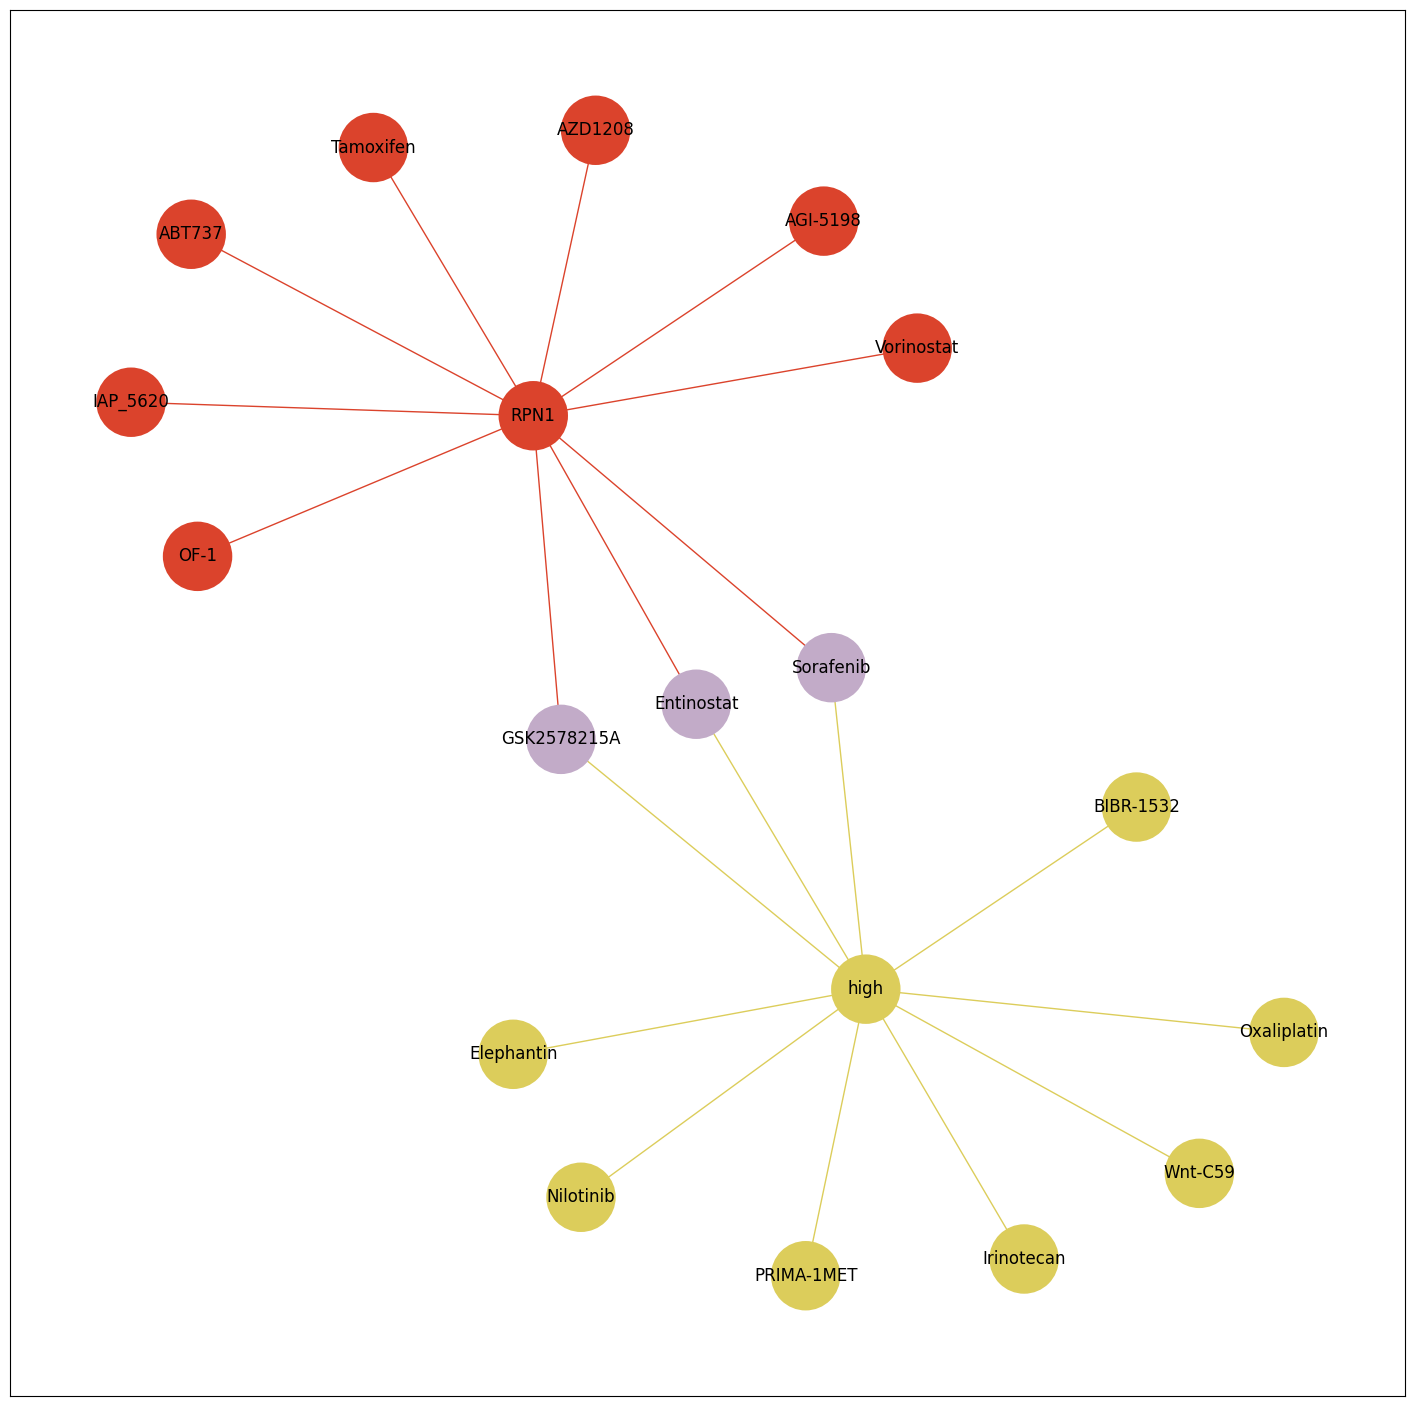

In [8]:
# 绘制图形
plt.figure(figsize=(18, 18))  # 增大图的尺寸
nx.draw_networkx(
    G,
    pos=pos,
    edge_color=edge_colors,
    node_color=node_colors,
    with_labels=True,
    node_size=2500,  # 调整节点大小
    font_size=12,  # 调整字体大小
    font_color='black',  # 字体颜色
    edgecolors='none'  # 移除节点边框
)

In [9]:
import os

# 方法1：使用原始字符串，推荐
os.chdir(r"E:\YUE实验（新）\14.药敏")

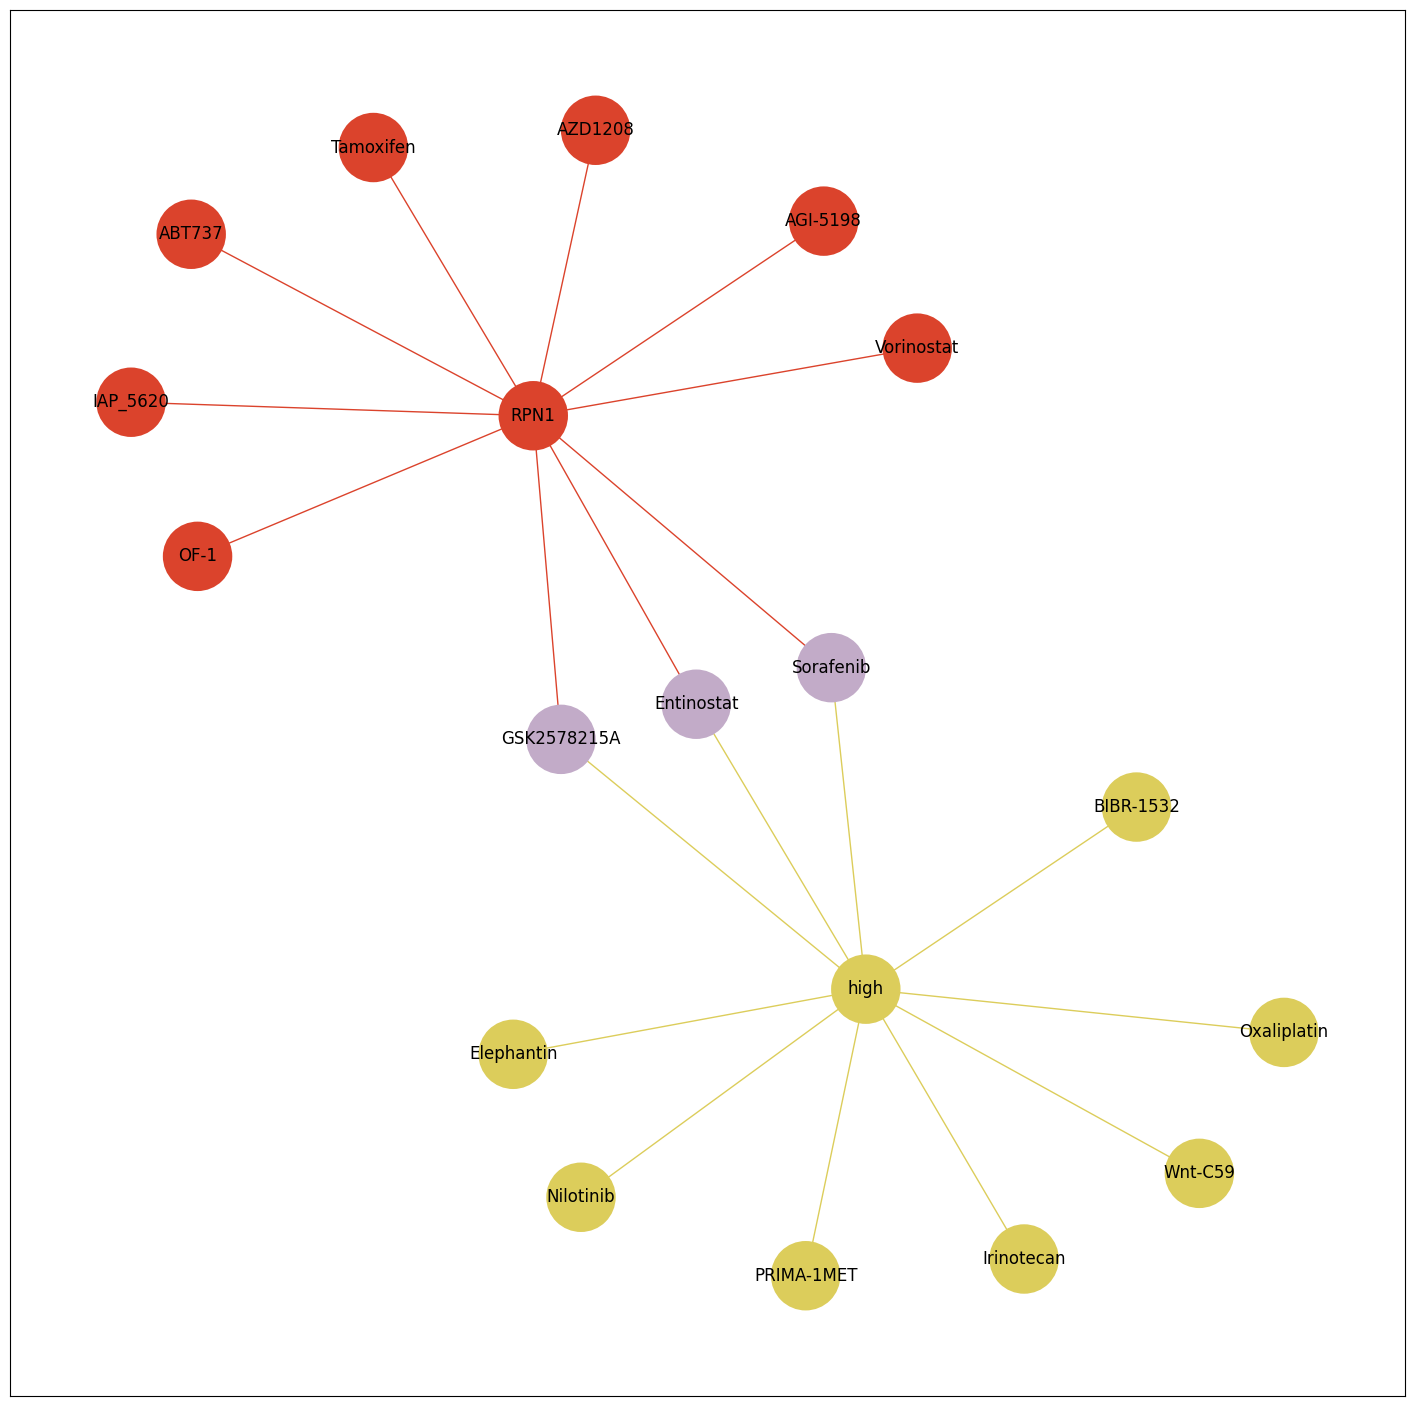

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 18))  # 设置图大小

nx.draw_networkx(
    G,
    pos=pos,
    edge_color=edge_colors,
    node_color=node_colors,
    with_labels=True,
    node_size=2500,
    font_size=12,
    font_color='black',
    edgecolors='none'
)

# 保存为 PDF 文件
plt.savefig("PML-overlap.pdf", format="pdf", bbox_inches="tight")

# 显示图像（可选）
plt.show()
